In [1]:
import numpy as np 
import matplotlib.pyplot as plt 



In [ ]:
# Algoritmo para geração de trajetória de mecanismo arbitrário utilizando evolução diferencial

# Gerar mecanismo
# Calcular trajetória da barra do acoplador + ângulo
# Transladar centro da trajetória para centro do trajetória objetivo
# Atribuir a função score como a soma das distâncias ao quadrado
# Verificar se score satisfaz o critério de parada
# Modificar parâmetros do mecanismo
# Loop

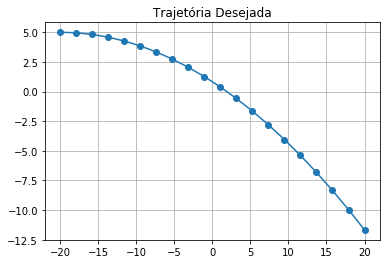

In [2]:
# Objetivo

fig, ax = plt.subplots()

x_offset = -20
y_offset = 5

x = np.linspace(0,40, 20)
y = -(0.0625)/6*x**2 

path = np.array([x,y])
path[0]+= x_offset
path[1]+= y_offset

ax.set_title('Trajetória Desejada')
ax.grid()
ax.plot(*path, marker='o')


In [3]:
class Vector2D():
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def rotate(self, theta):
        """
        theta em radianos
        
        """
        T = np.array([[np.cos(theta), -np.sin(theta)],
                      [np.sin(theta), np.cos(theta)]])
        
        return T@np.array([[self.x],[self.y]])
    
    def __add__(self, other):
        return Vector2D( self.x + other.x, self.y + other.y)
    
class Joint2D(Vector2D):
    x_movable = True
    y_movable = True
    def __init__(self, x, y, axis=None):
        super().__init__(x, y)
        
        self.setConstraint(axis)
            
    def setConstraint(self, axis=None):
        if isinstance(axis, int):
            if axis == 0:
                self.x_movable = False
                self.y_movable = True
            elif axis == 1:
                self.y_movable = False
                self.x_movable = True
        if isinstance(axis, str):
            if axis == 'both':
                self.x_movable = False
                self.y_movable = False
            elif axis == 'x':
                self.x_movable = False
                self.y_movable = True
            elif axis == 'y':
                self_y_movable = False
                self.x_movable = True
        if isinstance(axis, type(None)):
            self.x_movable = True
            self.y_movable = True

        
class Linkage2D():
    def __init__(self, obj1, obj2):
        if (type(obj1) == Joint2D and type(obj2) == Joint2D):
            self.joint_start = obj1
            self.joint_end = obj2
        
    
        

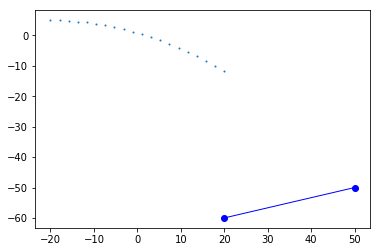

In [4]:

    


class Mechanism2D():
    joints = []
    linkages = []
    def __init__(self):
        pass
    
    def addPath(self, path):
        if path.shape[0] == 2:
            self.x_obj = path[0]
            self.y_obj = path[1]
        elif path.shape[1] == 2:
            self.x_obj = path.T[0]
            self.y_obj = path.T[1]
            
    def addLinkage(self, linkObj):
        self.linkages.append(linkObj)
    
    def addJoint(self, jointObj):
        self.joints.append(jointObj)
        
    def showMechanism(self):
        
        fig, ax = plt.subplots()
        if (hasattr(self, 'x_obj') and hasattr(self, 'y_obj')):
            ax.plot(self.x_obj, self.y_obj, marker='o', markersize=1, linestyle=' ')
        
        for joint in self.joints:
            ax.plot(joint.x, joint.y, marker='o', color='b')
            
        for link in self.linkages:
            ax.plot([link.joint_start.x, link.joint_end.x], 
                    [link.joint_start.y, link.joint_end.y], color='b', linewidth=1)
        
    
M = Mechanism2D()


o2 = Joint2D(50, -50, axis='both')
o4 = Joint2D(20, -60, axis='both')

l1 = Linkage2D(o2, o4)

M.addJoint(o2)
M.addJoint(o4)
M.addLinkage(l1)



M.addPath(path)




M.showMechanism()

    


In [ ]:

    



class Sintese():
    
    def __init__(self):
        pass
    def objetive_function(self, f, x, *args, **kwargs):
        """
        minimizar f(x, args, kwargs) 
        
        """
        print(f,x, args, kwargs)


        
s = Sintese()
s.objetive_function(lambda x: x**2, 1, 4, value = 'teste')
